# Лабораторная работа 1.
# Решение краевых задач методом разностных аппроксимаций.

In [12]:
import numpy as np
import sympy as sp
import pylab
import pandas
import math

def normalize_right_side_of_ode(coefficients, f):
    y = sp.Symbol('y')
    der_y = sp.Symbol("y'")
    p = coefficients[1] / coefficients[0]
    q = coefficients[2] / coefficients[0]
    f /= coefficients[0]
    return -p * der_y - q * y + f

def show_plots(answers, dx):
    for answer in answers:
        xlist = answer.keys()
        ylist = answer.values()
        pylab.plot (xlist, ylist)
    pylab.grid(True)
    pylab.show()
        
def solve_boundary_task_with_difference_method(coefficients, f, conditions, num_of_points):
    start_x, end_x = conditions.keys()
    step = (end_x - start_x) / (num_of_points - 1)
    x_points = np.linspace(start_x, end_x, num=num_of_points)
    right_ode_side = normalize_right_side_of_ode(coefficients, f)
    y_points = [sp.Symbol('y' + str(n)) for n in range(num_of_points)]
    system_of_equations = [y_points[0] - conditions[start_x],
                           y_points[num_of_points - 1] - conditions[end_x]]
    for i in range(1, num_of_points - 1):
        second_derivative = (y_points[i + 1] - 2 * y_points[i] + y_points[i - 1]) / step ** 2
        right_side = right_ode_side.subs([(x, x_points[i]),
                     (sp.Symbol('y'), y_points[i]),
                     (sp.Symbol("y'"), (y_points[i + 1] - y_points[i - 1]) / 2 * step)])
        equation = second_derivative - right_side
        system_of_equations.append(equation)
    found_y = list(sp.linsolve(system_of_equations, y_points))[0]
    return dict(zip(x_points, found_y))

def max_difference(f1, f2):
    f2 = [p[1] for p in f2.items() if p[0] in f1]
    f1 = list(f1.values())
    differences = [abs(p1 - p2) for p1, p2 in zip(f1, f2)]
    return max(differences)

def show_table_of_accuracy(data):
    col = ['Количество частей разбиения', 'Точность']
    display(pandas.DataFrame(data, columns=col))

def analize_accuracy(accuracy, task, start_n):
    n = start_n
    n_answer = task(n)
    list_of_answers = [n_answer]
    difference = math.inf
    data_for_table = []
    while difference > accuracy:
        twice_n_answer = task(2 * n)
        difference = max_difference(n_answer, twice_n_answer)
        n_answer = twice_n_answer
        list_of_answers.append(n_answer)
        n *= 2
        data_for_table.append([n, difference])
    show_plots(list_of_answers, 0.01)
    show_table_of_accuracy(data_for_table)
    print("Заданная точность достигается при n = {0}".format(n))

$$ 1) y'' + (1 + x^2) * y = -1; $$
$$ -1 <= x <= 1; $$
$$ y(-1) = y(1) = 0; $$

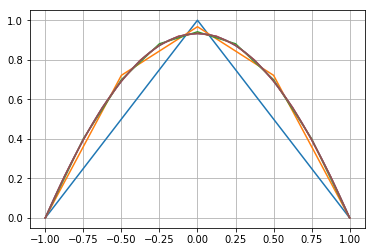

,Количество частей разбиения,Точность
0,4,0.0327868852459017
1,8,0.0256949473912748
2,16,0.00706561580170506
3,32,0.00179722025602258
4,64,0.000451092845865864


Заданная точность достигается при n = 64


In [13]:
x = sp.Symbol('x')
answer_1 = lambda n: solve_boundary_task_with_difference_method(
           [1, 0, 1 + x ** 2], -1,
           {-1:0, 1:0}, n + 1)
analize_accuracy(0.001, answer_1, 2)

In [14]:
print(max(answer_1(64).values()))

0.932204238459230


$$ 2) sin(1) * y'' + (1 + cos(1) * x^2) * y = -1;  $$
$$-1 <= x <= 1; $$
$$ y(-1) = y(1) = 0; $$

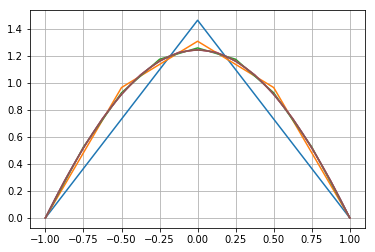

,Количество частей разбиения,Точность
0,4,0.155581729996628
1,8,0.0494432450708906
2,16,0.0124656840039019
3,32,0.00311573732515735
4,64,0.000778790856746481


Заданная точность достигается при n = 64


In [15]:
answer_2 = lambda n: solve_boundary_task_with_difference_method(
           [math.sin(1), 0, 1 + math.cos(1) * x ** 2], -1,
           {-1:0, 1:0}, n + 1)
analize_accuracy(0.001, answer_2, 2)

In [10]:
print (max(answer_2(64).values()))

1.24286806483862
